## Set up environment

In [1]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import os.path as op
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import nipype.interfaces.freesurfer as fs
import csv
import scipy
from scipy import stats
from numpy import *
from matplotlib.lines import Line2D;
import s3fs
from sklearn import preprocessing
import statsmodels.formula.api as smf
import permutation_test as p
import statistics
import itertools

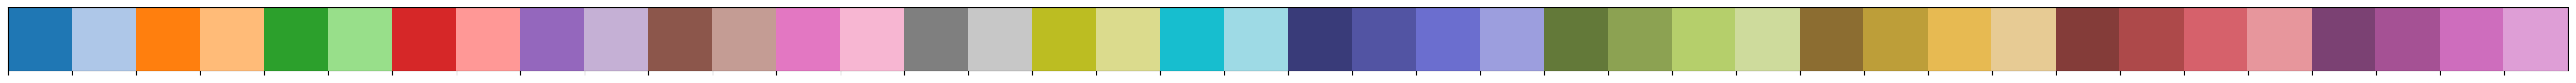

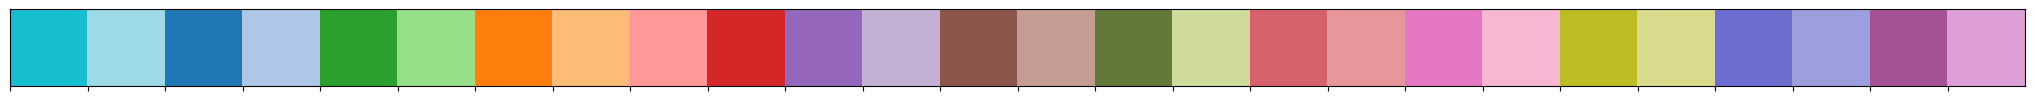

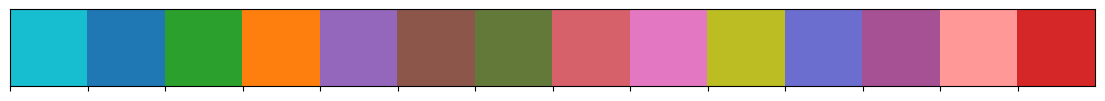

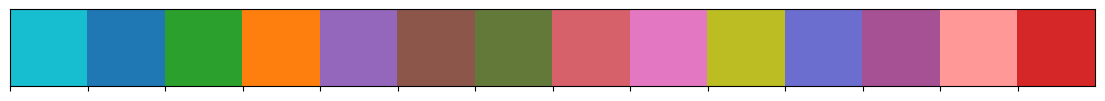

In [2]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']    
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3), 
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

In [36]:
# Get data
figshare_url = "https://figshare.com/ndownloader/files/"
file_dict = {"MatchedFullTermsSubjects.csv": "59732285", 
             "MatchedFulltermsTracts.csv": "59732291", 
             "MatchedPretermsAtFulltermTracts.csv": "59732294",
             "PretermAtFulltermMatchedSubjects.csv": "59732300", 
             "MatchedPretermsTracts.csv": "59732297",
             "PretermMatchedSubjects.csv": "59732303"}


import urllib.request
for kk, vv in file_dict.items():
    urllib.request.urlretrieve(figshare_url + vv, "inputData/" + kk)

('inputData/MatchedFullTermsSubjects.csv',
 <http.client.HTTPMessage at 0x7f5f8c257f50>)

('inputData/MatchedFulltermsTracts.csv',
 <http.client.HTTPMessage at 0x7f5f3cb9bf50>)

('inputData/MatchedPretermsAtFulltermTracts.csv',
 <http.client.HTTPMessage at 0x7f5f3cb9bd70>)

('inputData/PretermAtFulltermMatchedSubjects.csv',
 <http.client.HTTPMessage at 0x7f5f3cb9b3e0>)

('inputData/MatchedPretermsTracts.csv',
 <http.client.HTTPMessage at 0x7f5f3cb9b9b0>)

('inputData/PretermMatchedSubjects.csv',
 <http.client.HTTPMessage at 0x7f5f3cb9b2c0>)

In [ ]:
MatchedFullTermsSubjects=pd.read_csv('./inputData/MatchedFullTermsSubjects.csv', index_col=None)
MatchedFulltermsTracts=pd.read_csv('./inputData/MatchedFulltermsTracts.csv', index_col=None)
MatchedPretermsAtFulltermTracts=pd.read_csv('./inputData/MatchedPretermsAtFulltermTracts.csv', index_col=None)
PretermAtFulltermMatchedSubjects=pd.read_csv('./inputData/PretermAtFulltermMatchedSubjects.csv', index_col=None)
MatchedPretermsTracts=pd.read_csv('./inputData/MatchedPretermsTracts.csv', index_col=None)
PretermMatchedSubjects=pd.read_csv('./inputData/PretermMatchedSubjects.csv', index_col=None)

## T1w/T2w

In [24]:
# Summary statistics
mean_gm = PretermTracts['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(PretermTracts['WeAvGMT1wT2w'])

mean_wm = PretermTracts['t1wt2w'].mean()
std_wm = statistics.stdev(PretermTracts['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

GM Mean: 1.0266, Std Dev: 0.0430
WM Mean: 0.5779, Std Dev: 0.1386


In [25]:
# Summary statistics
mean_gm = PretermAtFulltermTracts['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(PretermAtFulltermTracts['WeAvGMT1wT2w'])

mean_wm = PretermAtFulltermTracts['t1wt2w'].mean()
std_wm = statistics.stdev(PretermAtFulltermTracts['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

GM Mean: 1.0936, Std Dev: 0.0650
WM Mean: 0.6950, Std Dev: 0.2102


In [26]:
# Summary statistics
mean_gm = MatchedFulltermsTracts['WeAvGMT1wT2w'].mean()
std_gm = statistics.stdev(MatchedFulltermsTracts['WeAvGMT1wT2w'])

mean_wm = MatchedFulltermsTracts['t1wt2w'].mean()
std_wm = statistics.stdev(MatchedFulltermsTracts['t1wt2w'])

# Output
print(f"GM Mean: {mean_gm:.4f}, Std Dev: {std_gm:.4f}")
print(f"WM Mean: {mean_wm:.4f}, Std Dev: {std_wm:.4f}")

GM Mean: 1.2415, Std Dev: 0.0781
WM Mean: 0.8528, Std Dev: 0.2492


In [27]:
# Common tract names for all groups (assumes same order across all DataFrames)
tracts = ['AF', 'AF', 'ATR', 'ATR', 'CC', 'CC', 'CS', 'CS', 'FcMa', 'FcMi', 
          'IFOF', 'IFOF', 'ILF', 'ILF', 'MLF', 'MLF', 'OR', 'OR', 'SLF', 'SLF', 
          'UNC', 'UNC', 'VOF', 'VOF', 'pARC', 'pARC']

# Define function to compute left-right GM difference
def compute_hemisphere_diff(df, label):
    df = df.copy()
    df['tract'] = tracts
    df = df.sort_values(by=['tract', 'tractID'])
    df['diffGM'] = df.groupby('tract')['WeAvGMT1wT2w'].diff().fillna(0)
    mean_diff = df['diffGM'].mean()
    return df, mean_diff

# Compute average per tractID
PretermMatchedAve, _ = compute_hemisphere_diff(
    PretermSubjects.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'PretermMatched'
)

PretermAtFulltermAve, _ = compute_hemisphere_diff(
    PretermAtFulltermSubjects.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'PretermAtFullterm'
)

MatchedFullTermsAve, _ = compute_hemisphere_diff(
    MatchedFulltermSubjects.groupby('tractID', as_index=False).mean(numeric_only=True), 
    'MatchedFullTerms'
)

# Run t-tests
def run_ttest(df1, df2, label1, label2):
    t, p = stats.ttest_rel(df1['diffGM'], df2['diffGM'])
    print(f'Difference GM {label1} vs. {label2} t = {t:.4f}, p = {p:.4g}')

run_ttest(PretermMatchedAve, PretermAtFulltermAve, 'Premies at Birth', 'Premies at Fullterm')
run_ttest(PretermMatchedAve, MatchedFullTermsAve, 'Premies at Birth', 'Fullterm')
run_ttest(PretermAtFulltermAve, MatchedFullTermsAve, 'Premies at Fullterm', 'Fullterm')

Difference GM Premies at Birth vs. Premies at Fullterm t = 3.5396, p = 0.001598
Difference GM Premies at Birth vs. Fullterm t = -0.6474, p = 0.5233
Difference GM Premies at Fullterm vs. Fullterm t = -2.7893, p = 0.009955


PearsonRResult(statistic=0.6547830001359276, pvalue=0.0002838734571860852)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7f5f8c2cc0e0>,
 [Text(0.95, 0, '0.95'),
  Text(1.0, 0, '1.00'),
  Text(1.05, 0, '1.05'),
  Text(1.1, 0, '1.10')])

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0')])

Text(0.5, 1.0, 'Preterms at birth')

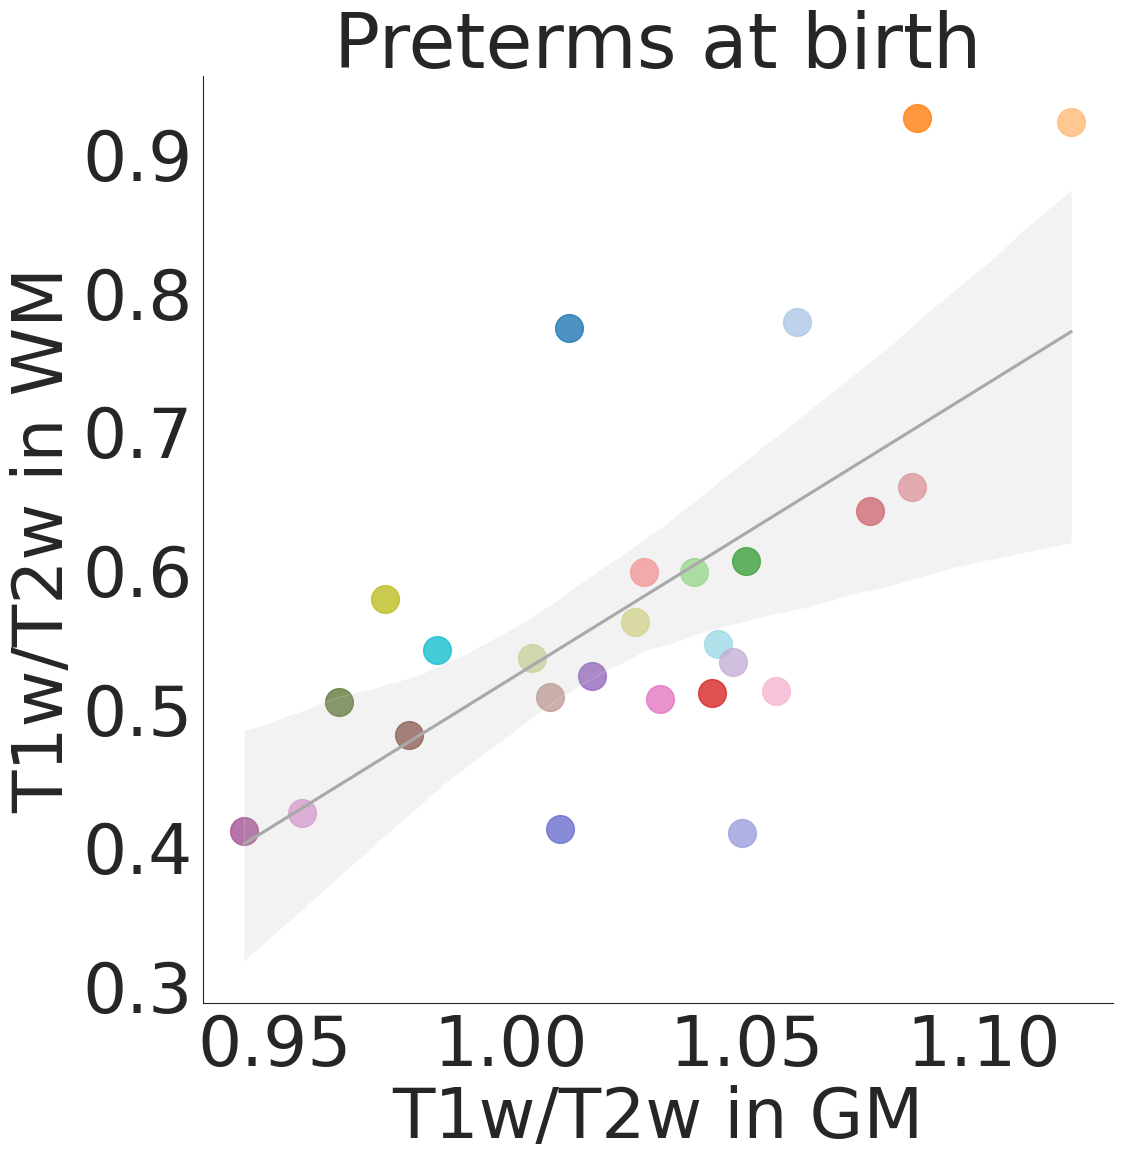

In [28]:
#Plot correlation of preterms at birth
sns.set_style('white');
fig1=sns.lmplot(
    data=PretermTracts, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=PretermTracts, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(PretermTracts['WeAvGMT1wT2w'], PretermTracts['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks([0.95, 1.00, 1.05, 1.10],fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Preterms at birth', fontsize=55)
plt.savefig('./figures/PretermMatchedMean.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.7339378082504551, pvalue=1.979237498903441e-05)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7f5f8c4437d0>,
 [Text(1.0, 0, '1.0'),
  Text(1.1, 0, '1.1'),
  Text(1.2, 0, '1.2'),
  Text(1.3, 0, '1.3')])

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4000000000000001, '1.4')])

Text(0.5, 1.0, 'Preterms at term')

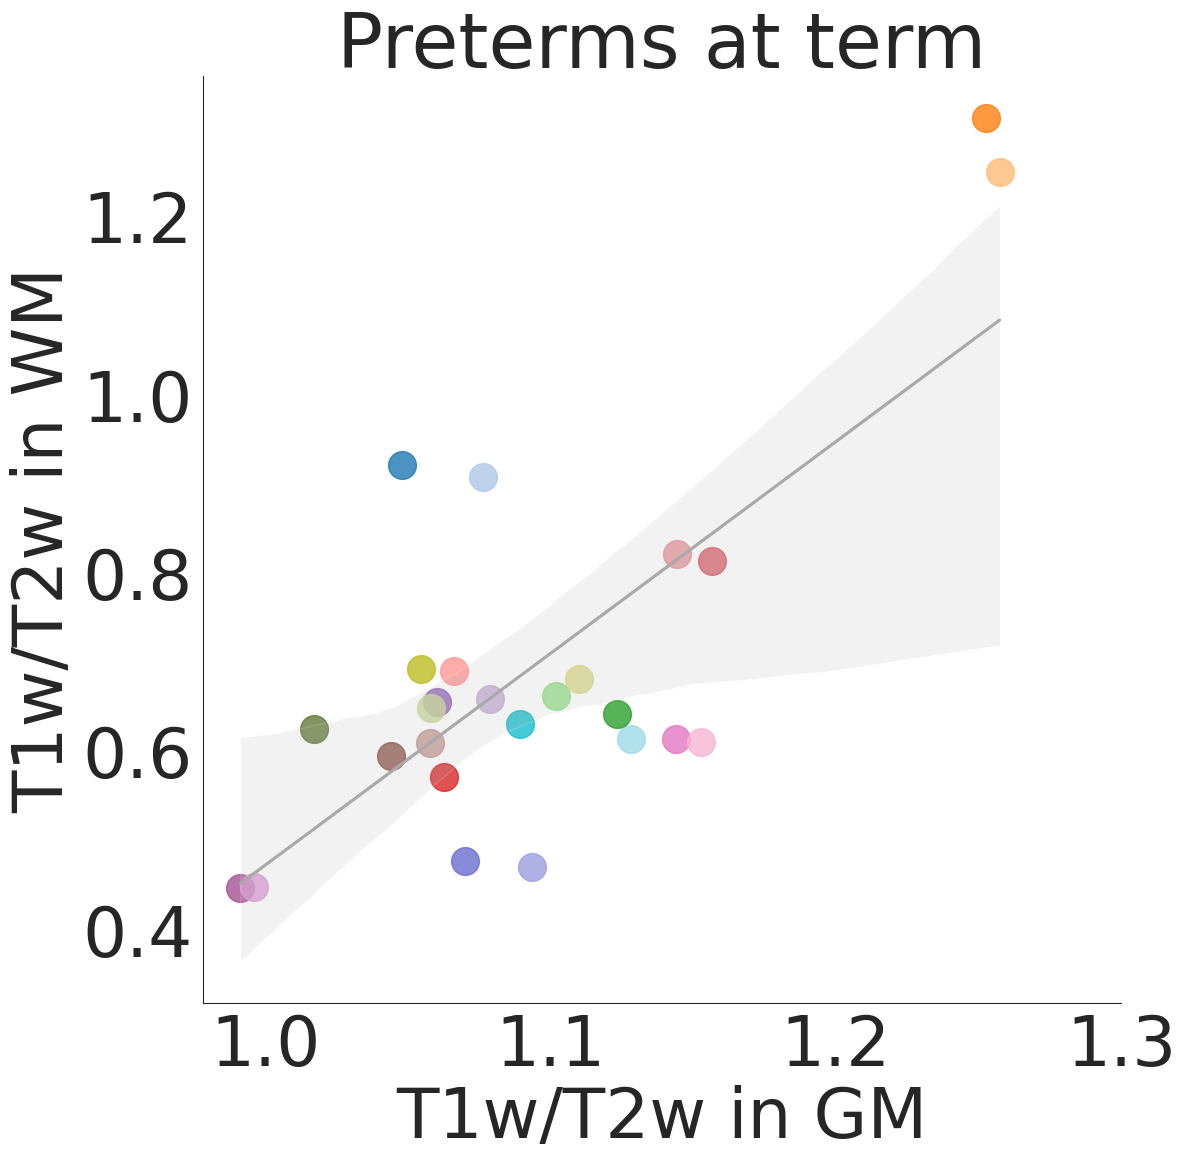

In [29]:
#Plot correlation of preterms at second scan
sns.set_style('white');
fig1=sns.lmplot(
    data=PretermAtFulltermTracts, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=PretermAtFulltermTracts, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(PretermAtFulltermTracts['WeAvGMT1wT2w'], PretermAtFulltermTracts['t1wt2w'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks([1.0, 1.1, 1.2, 1.3], fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Preterms at term', fontsize=55)
plt.savefig('./figures/PretermAtFullterm.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.7530211177853002, pvalue=9.03398896550521e-06)

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.000000000000007, 0.5, 'T1w/T2w in WM')

([<matplotlib.axis.XTick at 0x7f5f8c1ec470>,
 [Text(1.15, 0, '1.15'),
  Text(1.25, 0, '1.25'),
  Text(1.35, 0, '1.35'),
  Text(1.45, 0, '1.45')])

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4000000000000001, '1.4'),
  Text(0, 1.6, '1.6'),
  Text(0, 1.8, '1.8')])

Text(0.5, 1.0, 'Matched full-terms')

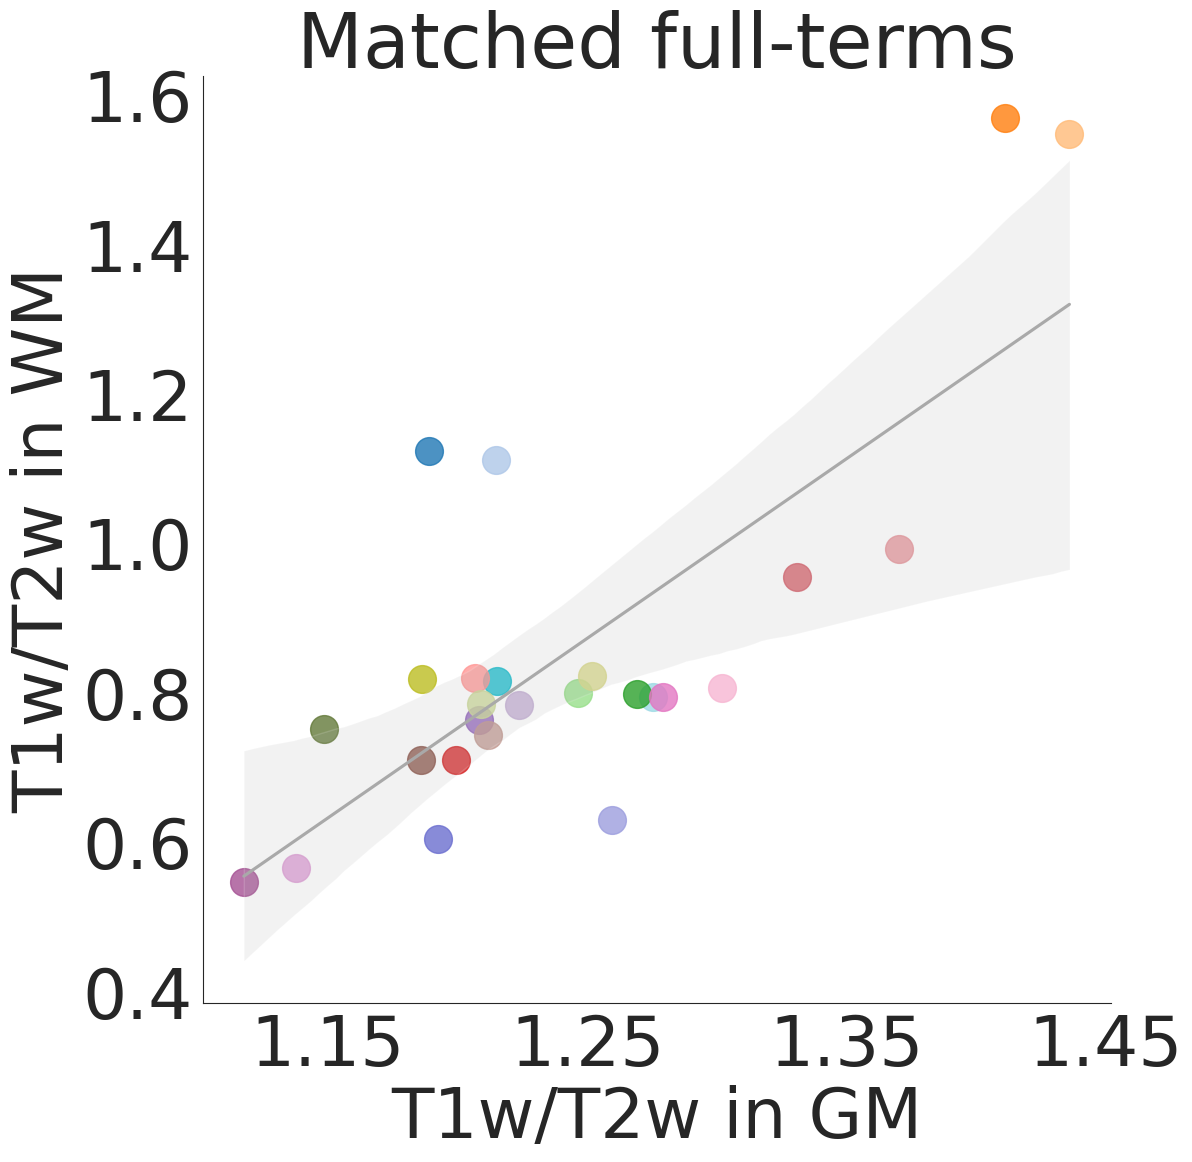

In [30]:
#Plot correlation of matched fullterms
sns.set_style('white');
fig1=sns.lmplot(
    data=MatchedFulltermsTracts, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", height=10, scatter_kws={"s": 400}, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=MatchedFulltermsTracts, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(MatchedFulltermsTracts['WeAvGMT1wT2w'], MatchedFulltermsTracts['t1wt2w'])
#fig1.legend(title='Tract', fontsize='15', title_fontsize='20', bbox_to_anchor=(0.7, 0.25, 0.5, 0.5), loc='right', borderaxespad=0, frameon=FcMilse)
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks([1.15, 1.25, 1.35, 1.45], fontsize=50)
plt.yticks(fontsize=50)
fig1.set_title('Matched full-terms', fontsize=55)
plt.savefig('./figures/MatchedFullterms.png', dpi=600, bbox_inches = "tight")

## Bootstrap Analyses

In [33]:
MatchedFulltermSubjects=pd.read_csv('./inputData/MatchedFullTermsSubjects.csv')
MatchedFulltermsTracts=pd.read_csv('./inputData/MatchedFulltermsTracts.csv')
PretermAtFulltermTracts=pd.read_csv('./inputData/MatchedPretermsAtFulltermTracts.csv')
PretermAtFulltermSubjects=pd.read_csv('./inputData/PretermAtFulltermMatchedSubjects.csv')
PretermTracts=pd.read_csv('./inputData/MatchedPretermsTracts.csv')
PretermSubjects=pd.read_csv('./inputData/PretermMatchedSubjects.csv')

In [34]:
a=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
n = 26
flatten = itertools.chain.from_iterable

PretermSubjects['SubjectNumber']=list(flatten(zip(*[a]*n))) 
PretermSubjects

PretermAtFulltermSubjects['SubjectNumber']=list(flatten(zip(*[a]*n))) 
PretermAtFulltermSubjects

MatchedFulltermSubjects['SubjectNumber']=list(flatten(zip(*[a]*n))) 
MatchedFulltermSubjects

,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w,SubjectNumber
0,sub1,163200,0,35.857143,28.857143,AFL,0.907255,0.564740,0
1,sub1,163200,0,35.857143,28.857143,AFR,0.952050,0.589118,0
2,sub1,163200,0,35.857143,28.857143,ATRL,0.975961,0.714446,0
3,sub1,163200,0,35.857143,28.857143,ATRR,0.990975,0.721688,0
4,sub1,163200,0,35.857143,28.857143,CCL,0.949348,0.580182,0
...,...,...,...,...,...,...,...,...,...
671,sub26,65200,0,34.714286,32.714286,UNCR,1.093177,0.542982,25
672,sub26,65200,0,34.714286,32.714286,VOFL,1.043507,0.423347,25
673,sub26,65200,0,34.714286,32.714286,VOFR,1.045004,0.389172,25
674,sub26,65200,0,34.714286,32.714286,pAFL,0.945608,0.428805,25


,subjectID,sessionID,session_index,scan_age,birth_age,tractID,WeAvGMT1wT2w,t1wt2w,SubjectNumber
0,sub1,178200.0,1.0,42.142857,28.857143,AFL,1.085238,0.545361,0
1,sub1,178200.0,1.0,42.142857,28.857143,AFR,1.136934,0.564323,0
2,sub1,178200.0,1.0,42.142857,28.857143,ATRL,1.048770,0.890493,0
3,sub1,178200.0,1.0,42.142857,28.857143,ATRR,1.076089,0.962870,0
4,sub1,178200.0,1.0,42.142857,28.857143,CCL,1.156337,0.636431,0
...,...,...,...,...,...,...,...,...,...
671,sub26,79600.0,1.0,40.428571,32.714286,UNCR,1.062476,0.691928,25
672,sub26,79600.0,1.0,40.428571,32.714286,VOFL,1.007222,0.484579,25
673,sub26,79600.0,1.0,40.428571,32.714286,VOFR,1.079313,0.492610,25
674,sub26,79600.0,1.0,40.428571,32.714286,pAFL,0.967715,0.439560,25


,subjectID,sessionID,tractID,WeAvGMT1wT2w,t1wt2w,gender,birth_age,scan_age,timeAfterBirth,SubjectNumber
0,sub1,142700,AFL,1.468183,1.031570,Female,41.142857,41.285714,0.142857,0
1,sub1,142700,AFR,1.490462,1.037096,Female,41.142857,41.285714,0.142857,0
2,sub1,142700,ATRL,1.327689,1.330665,Female,41.142857,41.285714,0.142857,0
3,sub1,142700,ATRR,1.307145,1.258415,Female,41.142857,41.285714,0.142857,0
4,sub1,142700,CCL,1.416259,0.972800,Female,41.142857,41.285714,0.142857,0
...,...,...,...,...,...,...,...,...,...,...
671,sub26,238400,UNCR,1.393651,0.891092,Male,39.000000,42.857143,3.857143,25
672,sub26,238400,VOFL,1.222156,0.563134,Male,39.000000,42.857143,3.857143,25
673,sub26,238400,VOFR,1.298959,0.627953,Male,39.000000,42.857143,3.857143,25
674,sub26,238400,pAFL,1.092645,0.571332,Male,39.000000,42.857143,3.857143,25


In [35]:
#Premature infants after birth vs. Premature infants at second scan

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from itertools import count, islice

x1 = PretermSubjects
y1 = PretermAtFulltermSubjects

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95

# Creating a list of numbers from 5 to 10
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
# Plot histogram of bootstrap differences
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='dashed', label='Mean Estimate')
#plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 20)
plt.xlabel('Bootstrap Correlation Differences', fontsize = 20)
plt.xlim(right=-0.070)
plt.xlim(left=-0.082)
plt.xticks(fontsize = 15)
#plt.tick_params(axis='x', top=False)
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize = 15)
#plt.tick_params(axis='y', right=False)
plt.title('Preterms at birth vs. Preterms at term', fontsize = 22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesPremiesFullTerm.png', dpi=600, bbox_inches = "tight")
plt.show()

KeyboardInterrupt: 

In [ ]:
#Premature infants after birth vs. Fullterm infants
x1 = PretermSubjects
y1 = MatchedFulltermSubjects

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95


# Creating a list of numbers from 1 to 1000
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
# Plot histogram of bootstrap differences
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='solid', label='Mean Estimate')
#plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 25)
plt.xlabel('Bootstrap Correlation Differences', fontsize=20)
plt.xlim(right=-0.095)
plt.xlim(left=-0.105)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize = 15)
plt.title('Preterms at birth vs. Matched full-terms', fontsize=22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesFullterm.png', dpi=600, bbox_inches = "tight")
plt.show()

In [19]:
#Preterm at second scan vs. fullterm infants

x1 = PretermAtFulltermSubjects
y1 = MatchedFulltermSubjects

data = []
n = 26
df1 = []
df2 = []
diff_correlations = []
confidence_level=95


# Creating a list of numbers from 1 to 1000
numbers = list(islice(count(1), 1000))

for _ in numbers:
    resample_indices = np.random.choice(26, size=26, replace=True)
    for subj in resample_indices:
        x1["SubjectNumber"]=x1['SubjectNumber'].apply(int)
        df_x = x1[x1['SubjectNumber']==subj]
        df1.append(df_x)
        y1["SubjectNumber"]=y1['SubjectNumber'].apply(int)
        df_y = y1[y1['SubjectNumber']==subj]
        df2.append(df_y)            
        
    df1_boot = pd.concat(df1)
    #df1_boot
    df2_boot = pd.concat(df2)
    #df2_boot
    df1_boot_mean = df1_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df1_boot_mean
    df2_boot_mean = df2_boot.groupby(['tractID'], as_index=False).mean([['t1wt2w', 'WeAvGMT1wT2w']])
    #df2_boot_mean
    
    r1 = pearsonr(df1_boot_mean['t1wt2w'], df1_boot_mean['WeAvGMT1wT2w'])[0]
    r2 = pearsonr(df2_boot_mean['t1wt2w'], df2_boot_mean['WeAvGMT1wT2w'])[0]
    observed_diff = r1 - r2
    #print(observed_diff)
    diff_correlations.append(observed_diff)
    
# Compute confidence intervals
lower_percentile = (100 - confidence_level) / 2
upper_percentile = 100 - lower_percentile
confidence_interval = np.percentile(diff_correlations, [lower_percentile, upper_percentile])
print("lower bound:",confidence_interval[0])
print("upper bound:",confidence_interval[1])
mean_diff = np.mean(diff_correlations)
print("mean_diff:", mean_diff)
    
from matplotlib import ticker
fig,ax = plt.subplots(figsize=(7,6))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))
plt.hist(diff_correlations, bins=100, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', label='Lower Bound')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', label='Upper Bound')
plt.axvline(mean_diff, color='blue', linestyle='solid', label='Mean Estimate')
plt.axvline(0, color='purple', linestyle='dashed', label='Zero')
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize = 25)
plt.xlabel('Bootstrap Correlation Differences', fontsize=20)
plt.xlim(right=-0.010)
plt.xlim(left=-0.022)
plt.xticks(fontsize = 15)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize = 15)
plt.title('Preterms at term vs. Matched full-term', fontsize=22)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.savefig('./figures/Bootstrap_PremiesFulltermFullterm.png', dpi=600, bbox_inches = "tight")
plt.show()

NameError: name 'islice' is not defined